In [0]:
# Import TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt


##The Fashion MNIST dataset includes:

60,000 training examples,
10,000 testing examples,
10 classes,
28×28 grayscale/single channel images

###The ten fashion class labels include:

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

In [0]:
#load data
fashion_mnist = keras.datasets.fashion_mnist
#hint: train - test ?
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

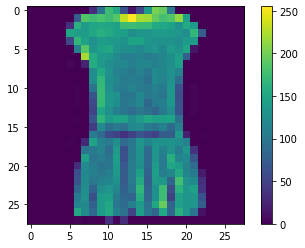

In [0]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
# plt.show()

In [0]:
#scale your data

train_images = train_images / 255.0

test_images = test_images / 255.0

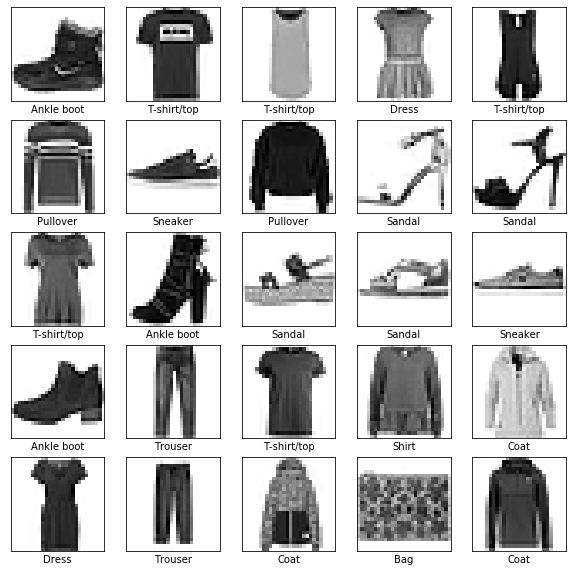

In [0]:
#see your first 25 object
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [0]:
train_labels = np.reshape(train_labels,(60000, 1))

**NOTE:** you should create most basic version of your network, then improve your network.


In [0]:
#create your network
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28, 28)),
    #put your hidden layers here
    keras.layers.Dense(32, activation=tf.nn.relu), # or = 'relu' in string
    keras.layers.Dense(32, activation=tf.nn.relu), 
    
    #last layer
    keras.layers.Dense(10, activation='softmax') # 10 is the size of class_names
])

In [0]:
#compile
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', # matrix of pictures contains zeros (sparse).
              metrics=['accuracy'])

#some useful parameters : (epochs,step_per_epoch,batch_size)
model.fit(train_images, train_labels, batch_size=128, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6364 - acc: 0.7843
Epoch 2/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4473 - acc: 0.8415
Epoch 3/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4080 - acc: 0.8544
Epoch 4/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3834 - acc: 0.8617
Epoch 5/15
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3660 - acc: 0.8682
Epoch 6/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3485 - acc: 0.8738
Epoch 7/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3373 - acc: 0.8765
Epoch 8/15
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3257 - acc: 0.8803
Epoch 9/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3165 - acc: 0.8848
Epoch 10/15
60000/60000 [==============================] - 

In [0]:
#model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3579 - acc: 0.8752
Test accuracy: 0.8752
Test loss: 0.35794297728538516


In [0]:
#predict
predictions = model.predict(test_images)

#take an example prediction from index zero. hint: argmax 
np.argmax(predictions[0]) # gives the index number of class_names which has the highest probability

9

In [0]:
#plot images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

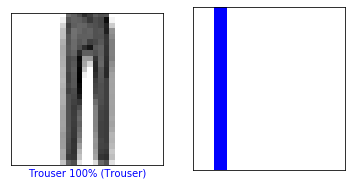

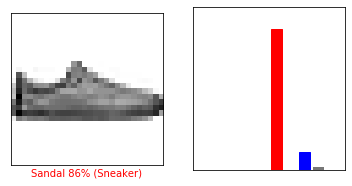

In [0]:


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  i = 0        # index number of the predicted_label
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


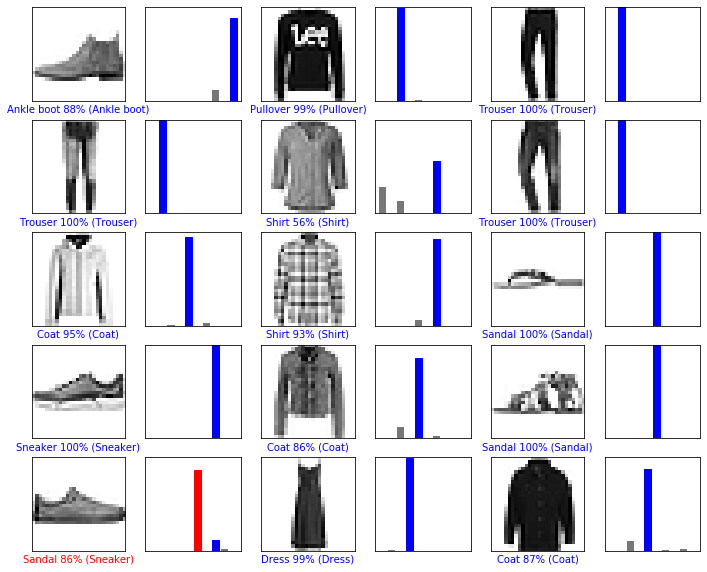

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
predictions_single = model.predict(img)
img.shape

(1, 28, 28)

9

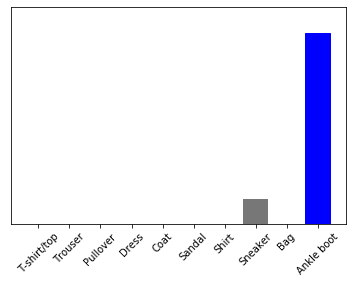

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])